In [1]:
df1 = spark.read.csv("gs://bigdataplatform-order/basket2.csv", header=True, inferSchema=True)

In [2]:
df2 = spark.read.csv("gs://bigdataplatform-order/Commodity_Names.csv", header=True, inferSchema=True)

In [3]:
df2.show(10)

+------+--------------------+
|    ID|                Name|
+------+--------------------+
| 59322|Capsuleer Day XVI...|
| 58797|Capsuleer Day XVI...|
| 37475|Medium Tech I Lar...|
|     0|             #System|
| 23783|'Abatis' 100mm St...|
| 23784|'Abatis' 100mm St...|
|365255|'Abatis' Basic Fe...|
|353255|'Abyss' Carthum D...|
| 16297|'Accord' Core Com...|
|356900|'Acolyth' A-86 Ac...|
+------+--------------------+
only showing top 10 rows



In [4]:
df = df1.join(df2,df1.type_id==df2.ID,"inner")

In [5]:
df.printSchema()

root
 |-- type_id: integer (nullable = true)
 |-- order_id: long (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)



In [6]:
df.show(10)

+-------+----------+-----+--------------------+
|type_id|  order_id|   ID|                Name|
+-------+----------+-----+--------------------+
|   2488|6021562107| 2488|          Warrior II|
|   2801|6022793671| 2801|Nova Javelin Torpedo|
|   3304|5381697003| 3304|Medium Hybrid Turret|
|   3687| 911234237| 3687|    Electronic Parts|
|   3715|6018351520| 3715|         Frozen Food|
|  15589| 911260145|15589|Federation Navy M...|
|  15591| 911260287|15591|Federation Navy S...|
|  19719|5381726698|19719|     Transport Ships|
|  29000| 911220857|29000|Optimal Range Scr...|
|  29002| 911266870|29002|Tracking Speed Sc...|
+-------+----------+-----+--------------------+
only showing top 10 rows



In [7]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import json
import pyspark.sql.functions as F
import pyspark.sql
from pyspark.sql.functions import col, skewness, kurtosis
from pyspark.context import SparkContext
from pyspark.sql.functions import * 
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import when
from pyspark.sql.functions import UserDefinedFunction

In [8]:
num_items = df.groupBy("Name").count()
num_items.show(10)

+--------------------+-----+
|                Name|count|
+--------------------+-----+
|Medium S95a Scope...|   21|
|Gallente Core Sys...|   38|
|Standup Capacitor...|   13|
|Clone Soldier Tra...|  141|
|Scan Rangefinding...|   38|
|Upgraded Explosiv...|    6|
|Kernite Mining Cr...|   19|
|  Minmatar Destroyer|   51|
|  Symmetry Decryptor|   29|
|C3-FTM Acid React...|   45|
+--------------------+-----+
only showing top 10 rows



In [9]:
num_orders = df.groupBy("order_id").count()
num_orders.show(10)

+----------+-----+
|  order_id|count|
+----------+-----+
|6039124631|    3|
|6028887349|    3|
|5793231487|    2|
|4651449712|    2|
|6023579915|    2|
|5381702628|    3|
|5909886346|    2|
|6046081527|    4|
|5834262629|    1|
|6046316506|    2|
+----------+-----+
only showing top 10 rows



(array([4.177e+03, 6.230e+02, 2.680e+02, 1.200e+02, 8.700e+01, 4.300e+01,
        1.400e+01, 4.000e+00, 4.000e+00, 5.000e+00, 2.000e+00, 6.000e+00,
        0.000e+00, 2.000e+00, 5.000e+00, 1.800e+01, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 4.48666667e+01, 8.87333333e+01, 1.32600000e+02,
        1.76466667e+02, 2.20333333e+02, 2.64200000e+02, 3.08066667e+02,
        3.51933333e+02, 3.95800000e+02, 4.39666667e+02, 4.83533333e+02,
        5.27400000e+02, 5.71266667e+02, 6.15133333e+02, 6.59000000e+02,
        7.02866667e+02, 7.46733333e+02, 7.90600000e+02, 8.34466667e+02,
        8.78333333e+02, 9.22200000e+02, 9.66066667e+02, 1.00993333e+03,
        1.05380000e+03, 1.09766667e+03, 1.14153333e+03, 1.18540000e+03,
        1.22926667e+03, 1.27313333e+03, 1.31700000e+03]),
 <BarContainer object of 30 artists>)

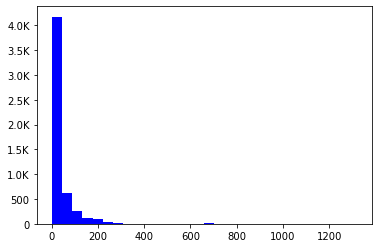

In [10]:
#The distribution of the number of items 
import matplotlib.pyplot as plt
from pyspark_dist_explore import hist

fig, ax = plt.subplots()

hist(ax, num_items.select('count'), bins = 30, color=['blue'])

In [11]:
df_basket = df.drop("ID", "region_id", "type_id")

In [12]:
df_basket.printSchema()

root
 |-- order_id: long (nullable = true)
 |-- Name: string (nullable = true)



In [13]:
df_basket.show(10)

+----------+--------------------+
|  order_id|                Name|
+----------+--------------------+
|6021562107|          Warrior II|
|6022793671|Nova Javelin Torpedo|
|5381697003|Medium Hybrid Turret|
| 911234237|    Electronic Parts|
|6018351520|         Frozen Food|
| 911260145|Federation Navy M...|
| 911260287|Federation Navy S...|
|5381726698|     Transport Ships|
| 911220857|Optimal Range Scr...|
| 911266870|Tracking Speed Sc...|
+----------+--------------------+
only showing top 10 rows



In [14]:
baskets = df_basket.groupBy('order_id').agg(collect_set('name').alias('basket'))

In [15]:
baskets.createOrReplaceTempView('baskets')

In [23]:
baskets.show(truncate = False)

+---------+-------------+
|order_id |basket       |
+---------+-------------+
|911190994|[Garbage]    |
|911190996|[Garbage]    |
|911191000|[Garbage]    |
|911191002|[Garbage]    |
|911191016|[Garbage]    |
|911191025|[Garbage]    |
|911191030|[Garbage]    |
|911191031|[Garbage]    |
|911191042|[Garbage]    |
|911191054|[Garbage]    |
|911191057|[Garbage]    |
|911191066|[Garbage]    |
|911191070|[Garbage]    |
|911191071|[Garbage]    |
|911191073|[Garbage]    |
|911191080|[Garbage]    |
|911191085|[Antibiotics]|
|911191089|[Antibiotics]|
|911191096|[Antibiotics]|
|911191101|[Antibiotics]|
+---------+-------------+
only showing top 20 rows



In [18]:
from pyspark.ml.fpm import FPGrowth

fp = FPGrowth(minSupport=0.001, minConfidence=0, itemsCol='basket', predictionCol='prediction')

In [20]:
model = fp.fit(baskets)

In [27]:
#Calculate frequent itemsets

mostPopularItemInABasket = model.freqItemsets
mostPopularItemInABasket.createOrReplaceTempView("mostPopularItemInABasket")

# Display frequent itemsets.
model.freqItemsets.show(truncate =False)

+---------------------------------------+----+
|items                                  |freq|
+---------------------------------------+----+
|[Mining Upgrades]                      |133 |
|[Gaze Survey Probe I Blueprint]        |137 |
|[Mining]                               |134 |
|[Astrahus Upwell Quantum Core]         |139 |
|[Nitrogen Isotopes]                    |191 |
|[Barren Command Center]                |156 |
|[Strip Miner I Blueprint]              |151 |
|[Discovery Survey Probe I Blueprint]   |136 |
|[Republic Fleet Private Elite Insignia]|134 |
|[Federation Navy Sergeant Insignia II] |148 |
|[Viscous Pyroxeres]                    |138 |
|[Republic Fleet Squad Leader Insignia] |141 |
|[Caldari Shuttle]                      |173 |
|[Temperate Command Center]             |161 |
|[Azure Plagioclase]                    |181 |
|[Federation Navy Midshipman Insignia I]|154 |
|[Quest Survey Probe I Blueprint]       |150 |
|[Scordite]                             |260 |
|[Antimatter 

In [25]:
spark.sql('''select items, freq from mostPopularItemInABasket 
          where size(items) > 2 order by freq desc limit 20''').show(truncate =False)

+-----+----+
|items|freq|
+-----+----+
+-----+----+



In [26]:
model.associationRules.show(25, truncate=False)

+----------+----------+----------+----+-------+
|antecedent|consequent|confidence|lift|support|
+----------+----------+----------+----+-------+
+----------+----------+----------+----+-------+



In [26]:
#Prediction

In [28]:
columns = ['basket']
new_data = [(['Nova Javelin Torpedo', 'Omber', 'Transport Ships'],), (['Plagioclase', 'Optimal Range Script Blueprint', 'Frozen Food'],)]
rdd = spark.sparkContext.parallelize(new_data)
new_df = rdd.toDF(columns)
new_df.printSchema()
new_df.show(2,False)

root
 |-- basket: array (nullable = true)
 |    |-- element: string (containsNull = true)

+----------------------------------------------------------+
|basket                                                    |
+----------------------------------------------------------+
|[Nova Javelin Torpedo, Omber, Transport Ships]            |
|[Plagioclase, Optimal Range Script Blueprint, Frozen Food]|
+----------------------------------------------------------+



In [29]:
model.transform(new_df).show(10, False)

+----------------------------------------------------------+----------+
|basket                                                    |prediction|
+----------------------------------------------------------+----------+
|[Nova Javelin Torpedo, Omber, Transport Ships]            |[]        |
|[Plagioclase, Optimal Range Script Blueprint, Frozen Food]|[]        |
+----------------------------------------------------------+----------+

